In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=1000,
    n_classes=2,
    random_state=1,
)


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [17]:
# Creatin dummy class
dummy_model_prob = [0 for _ in range(len(y_test))]
dummy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [18]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [31]:
model_prob = model.predict_proba(X_test)


In [33]:
model_prob = model_prob[:,1]

In [21]:
from sklearn.metrics import roc_auc_score

dummy_model_score = roc_auc_score(y_test, dummy_model_prob)
model_score = roc_auc_score(y_test, model_prob)
print(f"Dummy model score: {dummy_model_score}")
print(f"Model score: {model_score}")

Dummy model score: 0.5
Model score: 0.9232456140350878


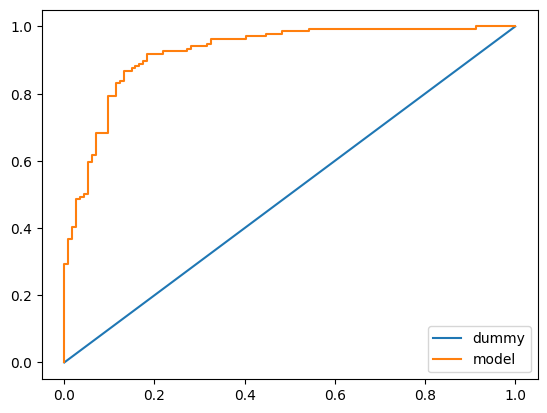

In [25]:
from sklearn.metrics import roc_curve

dummy_fpr,dummy_tpr,_ = roc_curve(y_test,dummy_model_prob)
model_fpr,model_tpr,threshold = roc_curve(y_test,model_prob)

plt.plot(dummy_fpr,dummy_tpr,label='dummy')
plt.plot(model_fpr,model_tpr,label='model')
plt.legend()
plt.show()


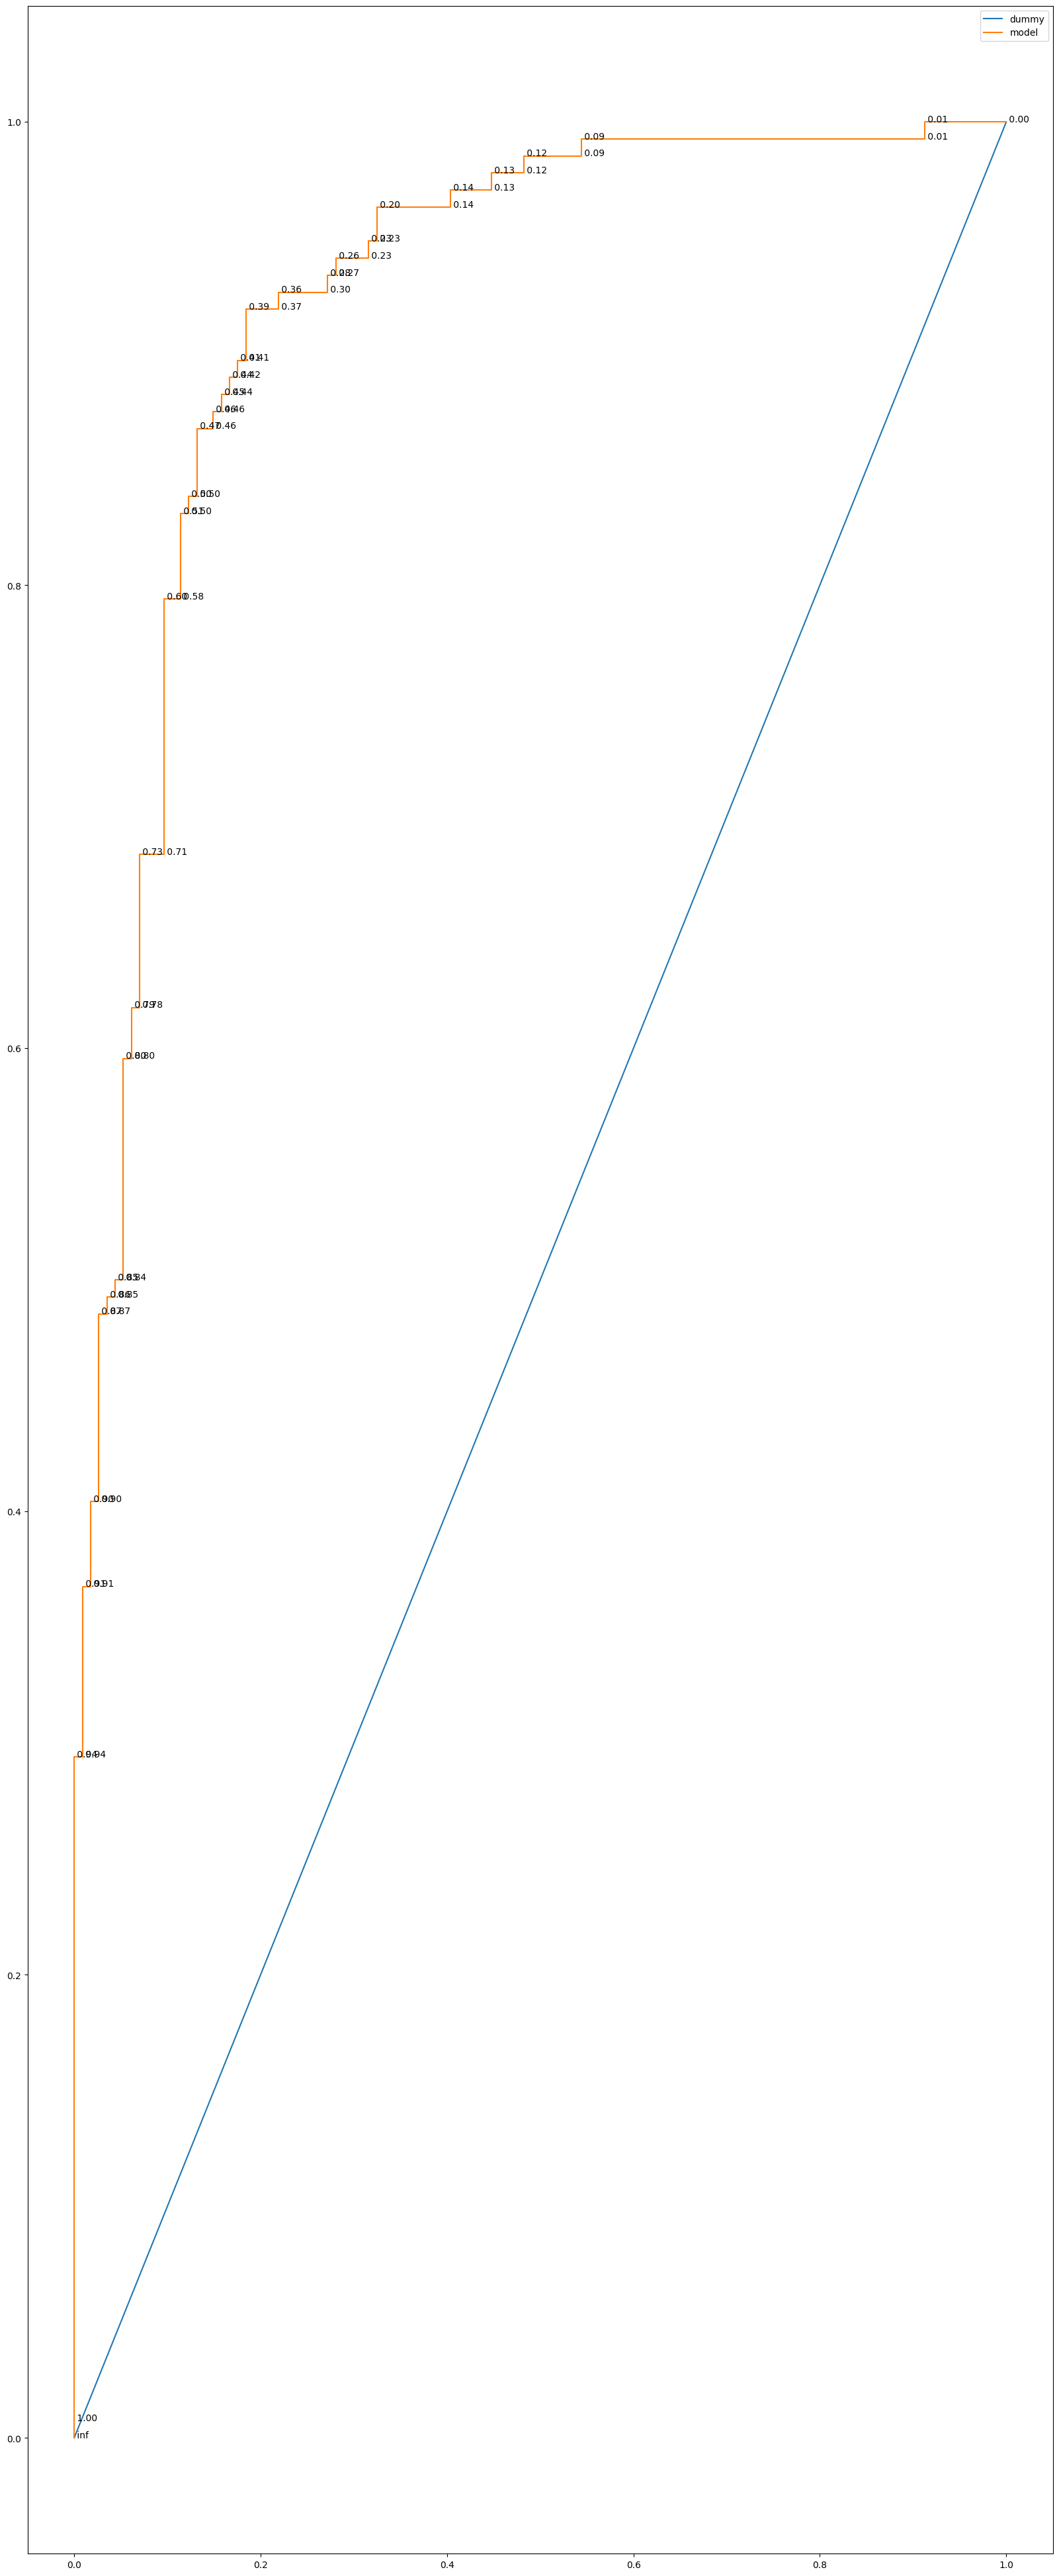

In [35]:
fig = plt.figure(figsize=(20,50))
dummy_fpr,dummy_tpr,_ = roc_curve(y_test,dummy_model_prob)
model_fpr,model_tpr,threshold = roc_curve(y_test,model_prob)
ax = fig.add_subplot(111)
for xyz in zip(model_fpr,model_tpr,threshold):
    ax.annotate(' %0.2f' %xyz[2],xy=(xyz[0],xyz[1]))

plt.plot(dummy_fpr,dummy_tpr,label='dummy')
plt.plot(model_fpr,model_tpr,label='model')
plt.legend()
plt.show()